In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data

## Davidson

**Traditional hate speech dataset, show bias against AAE on offensive language labeling**

In [ ]:
# multi-class labels, either hate_speech or offensive lan or neither
df_davidson = pd.read_csv('../data/davidson_dial.csv')
df_davidson.columns

Index(['id', 'count', 'hate_speech', 'offensive_language', 'neither', 'class',
       'tweet', 'hate_speech_rel', 'offensive_language_rel', 'neither_rel',
       'aav', 'hispanic', 'other', 'white', 'label'],
      dtype='object')

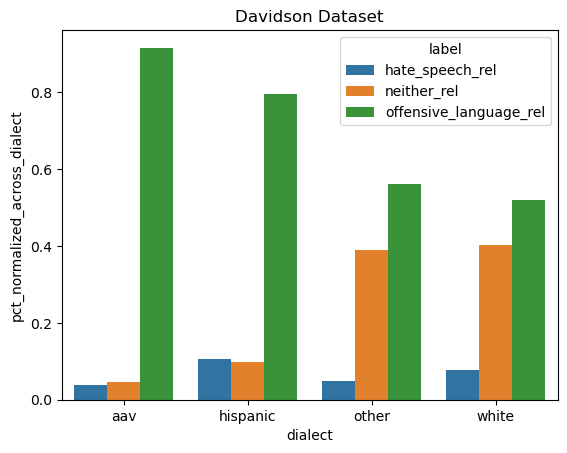

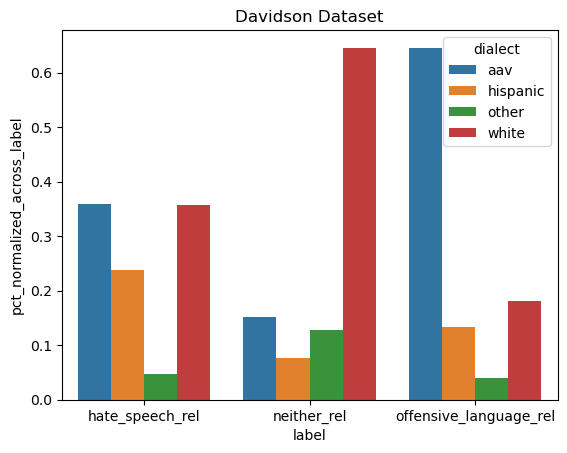

In [19]:
def normalize(row,var):
    return len(df_davidson[df_davidson[var]==row[var]])

df_davidson['dialect'] = df_davidson[['aav','hispanic','other','white']].idxmax(axis=1)

dialect_label_stats = df_davidson.groupby(['dialect','label'])['id'].count().reset_index()
dialect_label_stats['pct_normalized_across_dialect'] = dialect_label_stats['id']/dialect_label_stats.apply(normalize,args=('dialect',),axis=1)
dialect_label_stats['pct_normalized_across_label'] = dialect_label_stats['id']/dialect_label_stats.apply(normalize,args=('label',),axis=1)

sns.barplot(data = dialect_label_stats, x='dialect',y='pct_normalized_across_dialect',hue='label')
plt.title('Davidson Dataset')
plt.show()

sns.barplot(data = dialect_label_stats, x='label',y='pct_normalized_across_label',hue='dialect')
plt.title('Davidson Dataset')
plt.show()

In [20]:
dialect_label_stats

,dialect,label,id,pct_normalized_across_dialect,pct_normalized_across_label
0,aav,hate_speech_rel,514,0.037962,0.359441
1,aav,neither_rel,630,0.046529,0.151333
2,aav,offensive_language_rel,12396,0.915510,0.645961
3,hispanic,hate_speech_rel,340,0.105754,0.237762
4,hispanic,neither_rel,315,0.097978,0.075667
5,hispanic,offensive_language_rel,2560,0.796267,0.133403
6,other,hate_speech_rel,66,0.048565,0.046154
7,other,neither_rel,530,0.389993,0.127312
8,other,offensive_language_rel,763,0.561442,0.039760
9,white,hate_speech_rel,510,0.076473,0.356643


## Founta dataset

In [21]:
df_founta = pd.read_csv('../data/founta_all_dial.csv')
print(df_founta.columns)
print(pd.unique(df_founta.label))

Index(['id', 'label', 'tweet', 'votes', 'aav', 'hispanic', 'other', 'white'], dtype='object')
['spam' 'abusive' 'normal' 'hateful']


In [22]:
# what's spam??
for r,row in df_founta[df_founta.label=='spam'].iterrows():
    print(r,row['tweet'])
    if r > 100:
        break

0 Beats by Dr. Dre urBeats Wired In-Ear Headphones - White https://t.co/9tREpqfyW4 https://t.co/FCaWyWRbpE
10 Uber finds one allegedly stolen Waymo file – on an employee’s personal device https://t.co/ZLmrbf6S3O https://t.co/v4IdDN4hvu
26 4X DIY Birds Stencil Cutting Carbon Scrapbooking Card Diary Stamping Template FT https://t.co/GhSTgNHWxS https://t.co/onc8bySr62
35 one person followed me and 2 people unfollowed me // automatically checked by https://t.co/TSuRXiqGnP
49 #Farmville2 Giveaway Saturday Gifts (April 8, 2017) #Farmville2Info https://t.co/D4SZzsHa70 https://t.co/zW6Ce2rE0X
50 "Official look at the Air Jordan 13 Low ""Brave Blue"" releasing next weekend. https://t.co/MuPKIhR1oN https://t.co/klxVYxZarP"
58 You are a force to be reckoned with wherever you go now, and ... More for Aries https://t.co/XE6TWavcNQ
63 Transanimation accounted against scarcely 70 entering the may avails in reference to chinese the screen.: Vsxr https://t.co/SIY5RZO6Va
65 You want to dig in your heels

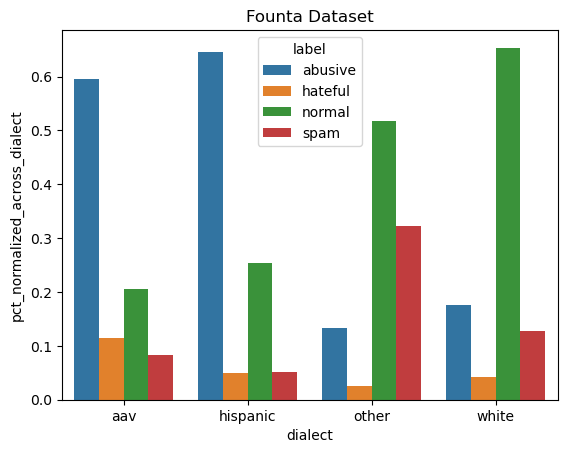

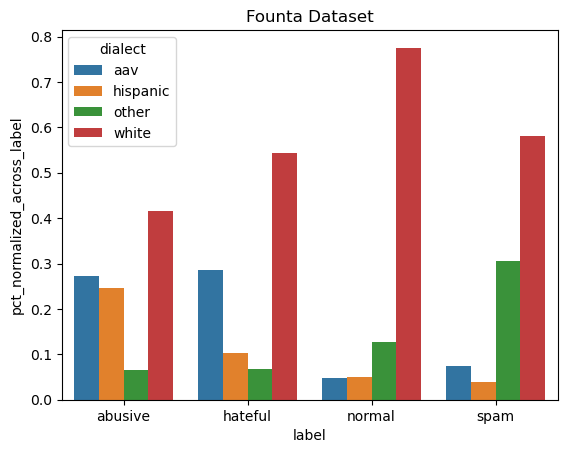

In [23]:
def normalize(row,var):
    return len(df_founta[df_founta[var]==row[var]])

df_founta['dialect'] = df_founta[['aav','hispanic','other','white']].idxmax(axis=1)

dialect_label_stats = df_founta.groupby(['dialect','label'])['id'].count().reset_index()
dialect_label_stats['pct_normalized_across_dialect'] = dialect_label_stats['id']/dialect_label_stats.apply(normalize,args=('dialect',),axis=1)
dialect_label_stats['pct_normalized_across_label'] = dialect_label_stats['id']/dialect_label_stats.apply(normalize,args=('label',),axis=1)

sns.barplot(data = dialect_label_stats, x='dialect',y='pct_normalized_across_dialect',hue='label')
plt.title('Founta Dataset')
plt.show()

sns.barplot(data = dialect_label_stats, x='label',y='pct_normalized_across_label',hue='dialect')
plt.title('Founta Dataset')
plt.show()

In [24]:
dialect_label_stats

,dialect,label,id,pct_normalized_across_dialect,pct_normalized_across_label
0,aav,abusive,7392,0.595409,0.272265
1,aav,hateful,1420,0.114378,0.286002
2,aav,normal,2562,0.206363,0.047576
3,aav,spam,1041,0.083850,0.074198
4,hispanic,abusive,6707,0.645214,0.247035
5,hispanic,hateful,509,0.048966,0.102518
6,hispanic,normal,2638,0.253776,0.048987
7,hispanic,spam,541,0.052044,0.038560
8,other,abusive,1770,0.133023,0.065193
9,other,hateful,340,0.025552,0.068479


## genearate train_data

In [25]:
df_davidson.rename(columns={'id':'davidson_id'},inplace=True)
df_founta.rename(columns={'id':'founta_id'},inplace=True)

train_data = pd.concat([df_davidson[['davidson_id','tweet','label','aav','dialect']],df_founta[['founta_id','tweet','label','aav','dialect']]],axis=0)
train_data.rename(columns={'label':'og_label'},inplace=True)
train_data['label'] = 0
train_data.loc[train_data['og_label'].isin(('hate_speech_rel','offensive_language_rel','hateful','abusive')),'label'] = 1
print(len(train_data))
train_data = train_data.drop_duplicates(subset=['tweet'],keep=False)
print(len(train_data))

124779
114774


## Sap19 Dataset

***dialect* and *race priming* as ways to reduce the racial bias in annotation**

In [26]:
df_sap19 = pd.read_csv('../data/sap2019risk_mTurkExperiment.csv')

df_sap19 = df_sap19.reset_index()
df_sap19 = df_sap19.rename(columns={'index':'sap19_id'})
print(len(df_sap19))
df_sap19 = df_sap19[~(df_sap19.raceIsWrong=='on')]
df_sap19 = df_sap19[~(df_sap19.dialectIsWrong=='on')]
print(len(df_sap19))

print(df_sap19.columns)
print(pd.unique(df_sap19['davidson_label']))
print(pd.unique(df_sap19['founta_label']))
print(pd.unique(df_sap19['condition']))

11706
11558
Index(['sap19_id', 'annotatorAge', 'annotatorGender', 'annotatorMinority',
       'annotatorPolitics', 'annotatorRace', 'intentYN', 'offensive2anyoneYN',
       'offensive2youYN', 'dialectIsWrong', 'raceIsWrong', 'WorkerIdHashed',
       'tweet', 'dialect', 'condition', 'username', 'davidson_label',
       'founta_label'],
      dtype='object')
['neither_rel' 'hate_speech_rel' 'offensive_language_rel' nan]
[nan 'normal' 'spam' 'hateful' 'abusive']
['text-only' 'dialect-priming' 'race-priming']


In [37]:
# test data relax - dialect/race primed answers
test_data_relaxed = df_sap19[df_sap19['condition']!='text-only']

test_data_relaxed.loc[test_data_relaxed['condition']=='dialect-priming','condition'] = test_data_relaxed.loc[test_data_relaxed['condition']=='dialect-priming','dialect']
test_data_relaxed.loc[test_data_relaxed['condition']=='race-priming','condition'] = test_data_relaxed.loc[test_data_relaxed['condition']=='race-priming','username']
# print(pd.unique(test_data_relaxed['condition']))

test_data_relaxed.loc[test_data_relaxed['condition']=='a Twitter user that is likely Black/African-American','condition'] = 'African-American'
test_data_relaxed.loc[test_data_relaxed['condition']=='a Twitter user','condition'] = np.NaN
test_data_relaxed.loc[test_data_relaxed['condition']=='a Twitter user that is likely White/Caucasian','condition'] = 'White/Caucasian'
test_data_relaxed.loc[test_data_relaxed['condition']=='a Twitter user that is likely Latino/Latina/Hispanic','condition'] = 'Latino'
test_data_relaxed.loc[test_data_relaxed['condition']=='General American','condition'] = 'White/Caucasian'
# print(pd.unique(test_data_relaxed['condition']))

test_data_relaxed['relaxed_unbiased_label'] = (test_data_relaxed[['intentYN', 'offensive2anyoneYN', 'offensive2youYN']].max(axis=1) > 0.5).astype(int)

test_data_relaxed = pd.concat([test_data_relaxed.groupby('tweet')[['condition', 'davidson_label', 'founta_label']].last(), 
           ((test_data_relaxed.groupby('tweet')['relaxed_unbiased_label'].sum()/test_data_relaxed.groupby('tweet')['relaxed_unbiased_label'].count())>0.5).astype(int)],
          axis=1)
test_data_relaxed.reset_index(inplace=True)
# test_data_relaxed

/tmp/ipykernel_8449/179027066.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_relaxed['relaxed_unbiased_label'] = (test_data_relaxed[['intentYN', 'offensive2anyoneYN', 'offensive2youYN']].max(axis=1) > 0.5).astype(int)


In [38]:
# test data strict - annotator's race and author's race are the same
test_data_strict = df_sap19[df_sap19['condition']!='text-only']

test_data_strict.loc[test_data_strict['condition']=='dialect-priming','condition'] = test_data_strict.loc[test_data_strict['condition']=='dialect-priming','dialect']
test_data_strict.loc[test_data_strict['condition']=='race-priming','condition'] = test_data_strict.loc[test_data_strict['condition']=='race-priming','username']
# print(pd.unique(test_data_strict['condition']))

test_data_strict.loc[test_data_strict['condition']=='a Twitter user that is likely Black/African-American','condition'] = 'African-American'
test_data_strict.loc[test_data_strict['condition']=='a Twitter user','condition'] = np.NaN
test_data_strict.loc[test_data_strict['condition']=='a Twitter user that is likely White/Caucasian','condition'] = 'White/Caucasian'
test_data_strict.loc[test_data_strict['condition']=='a Twitter user that is likely Latino/Latina/Hispanic','condition'] = 'Latino'
test_data_strict.loc[test_data_strict['condition']=='General American','condition'] = 'White/Caucasian'
# print(pd.unique(test_data_strict['condition']))

# print(len(test_data_strict))
def propagate_condition(row):
    try:
        return test_data_strict.loc[test_data_strict['tweet'] == row['tweet'],'condition'].iloc[0,]
    except:
        return 'text-only'
tmp = df_sap19.loc[df_sap19['condition']=='text-only']
tmp['condition'] = tmp.apply(propagate_condition,axis=1)
tmp = tmp[tmp['condition']!='text-only']
test_data_strict = pd.concat([test_data_strict,tmp],axis=0)
# print(len(test_data_strict))

test_data_strict = test_data_strict[((test_data_strict['condition']=='African-American') & (test_data_strict['annotatorRace']=='black')) | ((test_data_strict['condition']=='White/Caucasian') & (test_data_strict['annotatorRace']=='white')) | ((test_data_strict['condition']=='Latino') & (test_data_strict['annotatorRace']=='hisp'))]
# print(len(test_data_strict))

test_data_strict['strict_unbiased_label'] = (test_data_strict[['intentYN', 'offensive2anyoneYN', 'offensive2youYN']].max(axis=1) > 0.5).astype(int)

test_data_strict = pd.concat([test_data_strict.groupby('tweet')[['condition', 'davidson_label', 'founta_label']].last(), 
           test_data_strict.groupby('tweet')['annotatorRace'].apply(list),
           ((test_data_strict.groupby('tweet')['strict_unbiased_label'].sum()/test_data_strict.groupby('tweet')['strict_unbiased_label'].count())>0.5).astype(int)],
          axis=1)
test_data_strict.reset_index(inplace=True)
# test_data_strict

/tmp/ipykernel_8449/1286377209.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['condition'] = tmp.apply(propagate_condition,axis=1)


In [29]:
# # THIS IS A PROBLEM!!
# tmp = df_sap19[df_sap19.tweet=='"""Success is not impossible, but changing such a mindset is like a battle."" https://t.co/PxGUVk0zb8 https://t.co/a5D1OF8H5Z"']
# # tmp = test_data_strict[test_data_strict.tweet=='"""Success is not impossible, but changing such a mindset is like a battle."" https://t.co/PxGUVk0zb8 https://t.co/a5D1OF8H5Z"']
# # tmp['strict_unbiased_label'] = (tmp[['intentYN', 'offensive2anyoneYN', 'offensive2youYN']].max(axis=1) > 0.5).astype(int)
# # pd.concat([tmp.groupby('tweet')[['condition', 'davidson_label', 'founta_label']].last(), 
# #            tmp.groupby('tweet')['annotatorRace'].apply(list),
# #            ((tmp.groupby('tweet')['strict_unbiased_label'].sum()/tmp.groupby('tweet')['strict_unbiased_label'].count())>0.5).astype(int)],
# #           axis=1)
# tmp

In [39]:
train_data['T'] = 0
train_data.loc[train_data.dialect=='aav','T'] = 1

test_data_relaxed['T'] = 0
test_data_relaxed.loc[test_data_relaxed.condition=='African-American','T'] = 1

test_data_strict['T'] = 0
test_data_strict.loc[test_data_strict.condition=='African-American','T'] = 1

In [50]:
# need to find prob of aav from original df_davidson and df_founta - this will be the propensity
"""
Preprocess tweets.
"""

import re
import string
import nltk
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from emoji import demojize

EMOTICONS = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3', ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L',
    ':<', ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\',
    ':-c', ':c', ':{', '>:\\', ';('
])

PUNCT = set(string.punctuation)


def split_hashtag(tweet):
    '''
    take a string, find all hashtags, remove "#" and split hashtag into words
    '''
    tweet_toks = tweet.split(" ")
    final_tweet_toks = []
    for i in range(len(tweet_toks)):
        if tweet_toks[i].startswith("#"):
            hashtag = tweet_toks[i][1:]
            split_hashtag = re.findall('[0-9]+|[A-Z][a-z]+|[A-Z][A-Z]+|[a-z]+',
                                       hashtag)
            final_tweet_toks.extend(split_hashtag)
        else:
            final_tweet_toks.append(tweet_toks[i])
    tweet = " ".join(final_tweet_toks)
    return tweet


def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)


def preprocess_tweet(tweet):
    """
    preprocess one string (tweet):
    1. remove URLs
    2. replace all mentions with "@user"
    3. remove or split hashtags
    4. emojis to description
    5. to lower case
    6. remove punctuations
    7. remove non-ascii
    8. remove emoticons

    """
    try:
        # remove URLs
        tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',
                    '', tweet)
        tweet = re.sub(r'http\S+', '', tweet)
        # remove usernames
        tweet = re.sub('@[^\s]+', '', tweet)
        # remove amp
        tweet = re.sub('amp', '', tweet)
        # remove the # in hashtag and split hashtags
        tweet = split_hashtag(tweet)
        # remove hashtags
        # tweet = re.sub('#[^\s]+', '', tweet)
        # emojis to description
        # tweet = demojize(tweet)
        # remove emojis
        tweet = remove_emojis(tweet)
        # convert text to lower-case
        tweet = tweet.lower()
        # remove any other punctuation
        tweet = ''.join([char for char in tweet if char not in PUNCT])
        # remove non-ascii characters
        tweet = re.sub(r'[^a-zA-Z]+', ' ', tweet)
        # remove stopwords and emoticons from final word list
        stop_words = set(stopwords.words('english'))
        tweet = ' '.join([w for w in word_tokenize(tweet) if (w not in EMOTICONS and len(w)<15)])
        # remove consecutive spaces
    except:
        return ""
    return tweet


def preprocess(corpus):
    """
    preprocess a list of strings (tweets)
    """
    outcorpus = []
    for text in corpus:
        outcorpus.append(preprocess_tweet(text))
    return outcorpus

df_davidson['processed'] = preprocess(df_davidson['tweet'].tolist())
df_founta['processed'] = preprocess(df_founta['tweet'].tolist())
test_data_relaxed['processed'] = preprocess(test_data_relaxed['tweet'].tolist())
test_data_strict['processed'] = preprocess(test_data_strict['tweet'].tolist())

[nltk_data] Downloading package punkt to
[nltk_data]     /nas/home/siyiguo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /nas/home/siyiguo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
print(len(test_data_relaxed))
test_data_relaxed = test_data_relaxed.merge(df_davidson[['processed','aav']].drop_duplicates(subset=['processed']),how='left',on='processed').merge(df_founta[['processed','aav']].drop_duplicates(subset=['processed']),how='left',on='processed')
test_data_relaxed.loc[~test_data_relaxed.aav_y.isnull(),'aav_x'] = test_data_relaxed.loc[~test_data_relaxed.aav_y.isnull(),'aav_y']
print(len(test_data_relaxed),len(test_data_relaxed[test_data_relaxed.aav_x.isnull()]))
test_data_relaxed = test_data_relaxed.drop_duplicates(subset=['processed'])
print(len(test_data_relaxed))
test_data_relaxed = test_data_relaxed.drop('aav_y',axis=1)
test_data_relaxed

,tweet,condition,davidson_label,founta_label,relaxed_unbiased_label,T,processed,aav_x
0,""" i spend my money how i want bitch its my bus...",African-American,offensive_language_rel,None,1,1,i spend my money how i want bitch its my business,0.510962
1,"""""""Couture, Thornton out indefinitely as Shark...",None,None,normal,0,0,couture thornton out indefinitely as sharks ge...,0.094111
2,"""""""It takes a village to raise a child"""" FFS A...",None,None,hateful,1,0,it takes a village to raise a child ffs and a ...,0.110902
3,"""""""Nicki Minaj Shows Off Her Big Boobs In Larg...",African-American,None,spam,0,1,nicki minaj shows off her big boobs in large c...,0.380385
4,"""""""See you after 2 hoes"""" """"Hours*"""" I fucking...",None,None,abusive,0,0,see you after hoes hours i fucking dieeed,0.248238
...,...,...,...,...,...,...,...,...
1317,{He Now Calls Another Woman's Name In His Slee...,African-American,None,normal,0,1,he now calls another womans name in his sleep ...,0.306587
1318,~*~*New Track*~*~:: ‘Hot Science + Luxi - Have...,None,None,spam,0,0,new track hot science luxi have no fear via ni...,0.099896
1319,‘Holy Mountain Picnic Massacre Blues EP’ 12’’ ...,None,None,hateful,0,0,holy mountain picnic massacre blues ep pic dis...,0.050195
1320,╭&#128151;➱ #EADT930 ┊B.T ╰&#127800;➱Kiss&#128...,African-American,None,spam,0,1,eadt bt kiss hola,0.000000


In [82]:
print(len(test_data_strict))
test_data_strict = test_data_strict.merge(df_davidson[['processed','aav']].drop_duplicates(subset=['processed']),how='left',on='processed').merge(df_founta[['processed','aav']].drop_duplicates(subset=['processed']),how='left',on='processed')
test_data_strict.loc[~test_data_strict.aav_y.isnull(),'aav_x'] = test_data_strict.loc[~test_data_strict.aav_y.isnull(),'aav_y']
print(len(test_data_strict),len(test_data_strict[test_data_strict.aav_x.isnull()]))
test_data_strict = test_data_strict.drop_duplicates(subset=['processed'])
print(len(test_data_strict))
test_data_strict = test_data_strict.drop('aav_y',axis=1)
test_data_strict

597
597 0
596


,tweet,condition,davidson_label,founta_label,annotatorRace,strict_unbiased_label,T,processed,aav_x
0,"""""""Nicki Minaj Shows Off Her Big Boobs In Larg...",African-American,None,spam,[black],0,1,nicki minaj shows off her big boobs in large c...,0.380385
1,"""""""Success is not impossible, but changing suc...",White/Caucasian,None,normal,"[white, white, white, white, white]",0,0,success is not impossible but changing such a ...,0.160720
2,"""""""The business of business is relationships; ...",White/Caucasian,None,normal,"[white, white, white, white, white, white]",0,0,the business of business is relationships the ...,0.222762
3,"""#OpExposeCPS TEACHERS too! Another """"trusted""...",Latino,None,spam,"[hisp, hisp]",1,0,opexposecps teachers too another trusted membe...,0.205917
4,"""@user """"That's it? Huh?"""" She pushed the leg ...",White/Caucasian,None,hateful,"[white, white, white, white, white, white]",0,0,thats it huh she pushed the leg with her foot ...,0.284154
...,...,...,...,...,...,...,...,...,...
592,thoughts on persona 5 so far: RLY GOOD?! THo I...,White/Caucasian,None,normal,"[white, white, white, white, white, white, white]",0,0,thoughts on persona so far rly good tho i find...,0.112371
593,today i start breaking in a new pair of docs h...,White/Caucasian,neither_rel,None,"[white, white, white, white, white, white, whi...",0,0,today i start breaking in a new pair of docs h...,0.152980
594,when you secretly hate the bitch https://t.co/...,Latino,None,abusive,"[hisp, hisp, hisp]",1,0,when you secretly hate the bitch,0.212587
595,why was I so blind and fucking dumb to see tha...,White/Caucasian,None,abusive,"[white, white, white, white, white, white]",0,0,why was i so blind and fucking dumb to see tha...,0.136486


In [ ]:
# def match_tweet(row):
#     import numpy as np
    
#     text = row['text']

#     first_four = [w for w in text.split() if '@' not in w][3:7]
#     try:
#         if row['davidson_label'] is not None:
#             a = df_davidson.loc[(df_davidson.tweet.str.contains(first_four[0])) & (df_davidson.tweet.str.contains(first_four[1])) & (df_davidson.tweet.str.contains(first_four[2])) & (df_davidson.tweet.str.contains(first_four[3])),['tweet','aav']]
#             # print('match:',df_davidson.loc[(df_davidson.tweet.str.contains(first_four[0])) & (df_davidson.tweet.str.contains(first_four[1])) & (df_davidson.tweet.str.contains(first_four[2])) & (df_davidson.tweet.str.contains(first_four[3])),['tweet','aav']])
#             # print(a)
#             # a = df_davidson.loc[df_davidson.tweet.str.contains(first_four),['tweet','aav']]
#             # print('match: ',df_davidson.loc[df_davidson.tweet.str.contains(first_four),['tweet','aav']])
#             # print(a.tolist()[0])
#         if row['founta_label'] is not None:
#             a = df_founta.loc[(df_founta.tweet.str.contains(first_four[0])) & (df_founta.tweet.str.contains(first_four[1])) & (df_founta.tweet.str.contains(first_four[2])) & (df_founta.tweet.str.contains(first_four[3])),['tweet','aav']]
#             # print('match:',df_founta.loc[(df_founta.tweet.str.contains(first_four[0])) & (df_founta.tweet.str.contains(first_four[1])) & (df_founta.tweet.str.contains(first_four[2])) & (df_founta.tweet.str.contains(first_four[3])),['tweet','aav']])
#             # print(a)
#             # a = df_founta.loc[df_founta.tweet.str.contains(first_four),['tweet','aav']]
#             # print('match: ',df_founta.loc[df_founta.tweet.str.contains(first_four),['tweet','aav']])
#             # print(a.tolist()[0])
#         if len(a['aav'].tolist()) == 1:
#             return a['aav'].tolist()[0]
#         elif len(a['aav'].tolist()) == 0:
#             print('no match found:\n',row)
#             return np.NaN
#         else:
#             print('multiple matches:\n',row)
#             print(a)
#             return np.NaN
#     except:
#         return np.NaN
    

In [83]:
train_data = train_data[~train_data.tweet.isin(set(test_data_relaxed.tweet.tolist()))]
print(len(train_data))
train_data = train_data[~train_data.tweet.isin(set(test_data_strict.tweet.tolist()))]
print(len(train_data))
test_data_og = train_data.sample(frac=0.15,random_state=33)
train_data = train_data.drop(test_data_og.index)

114204
114203


In [84]:
train_data.rename(columns={'tweet':'text','aav':'propensity'},inplace=True)
test_data_relaxed.rename(columns={'tweet':'text','relaxed_unbiased_label':'label','aav_x':'propensity'},inplace=True)
test_data_strict.rename(columns={'tweet':'text','strict_unbiased_label':'label','aav_x':'propensity'},inplace=True)
test_data_og.rename(columns={'tweet':'text','aav':'propensity'},inplace=True)

train_data.to_csv('../data/train_data.csv',index=False)
test_data_relaxed.to_csv('../data/test_data_relaxed.csv',index=False)
test_data_strict.to_csv('../data/test_data_strict.csv',index=False)
test_data_og.to_csv('../data/test_data_original.csv',index=False)

## Sap22 Dataset

In [14]:
# turn this into test data?
df_sap22 = pd.read_csv('../data/annWithAttitudes/largeScale.csv')
df_sap22.columns

Index(['Unnamed: 0', 'postId', 'tweet', 'ogId', 'ogLabel', 'source',
       'ogLabelToxic', 'aae', 'hispanic', 'other', 'white', 'dialAm', 'noi',
       'oi', 'oni', 'vulgar', 'targetsBlackPeople', 'isAAE', 'postCategory',
       'altruism', 'annotatorAge', 'annotatorGender', 'annotatorMinority',
       'annotatorPolitics', 'annotatorRace', 'dontUnderstand', 'empathy',
       'freeSpeech', 'harmHateSpeech', 'intent', 'lingPurism', 'racism',
       'racist', 'toany', 'toyou', 'traditionalism', 'off_avg'],
      dtype='object')